# 설정

## 기본 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rc('font', family='NanumBarunGothic') 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 27 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,876 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129502 files and di

## 세팅

### KOSPI

In [3]:
# KOSPI 데이터 불러오기 
kospi = pd.read_csv('/content/drive/MyDrive/DSL/kospi_data.csv')

In [4]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kospi['Close_lag'] = kospi['Close'].shift(1)

#로그수익률 칼럼 생성
kospi['Log_Rate'] = np.log(kospi['Close']/kospi['Close_lag'])

In [5]:
kospi['Date'] = pd.to_datetime(kospi['Date'])

kospi['Month'] = [x.month for x in kospi['Date']]
kospi['Day'] = [x.day for x in kospi['Date']]
kospi['Year'] = [x.year for x in kospi['Date']]

kospi['Weekday'] = kospi['Date'].dt.dayofweek
rate = kospi.groupby(['Year', 'Month'])['Log_Rate'].sum()
kospi_change = rate.reset_index()

kospi

,Date,Close,Open,High,Low,Volume,Change,Close_lag,Log_Rate,Month,Day,Year,Weekday
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,NaN,NaN,5,1,1981,4
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,123.60,-0.000809,5,2,1981,5
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,123.50,-0.023762,5,4,1981,0
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,120.60,0.000829,5,6,1981,2
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,120.70,-0.011667,5,7,1981,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,2447.45,0.012106,8,25,2022,3
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,2477.26,0.001521,8,26,2022,4
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,2481.03,-0.022063,8,29,2022,0
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,2426.89,0.009857,8,30,2022,1


### KOSDAQ

In [6]:
kosdaq = pd.read_csv('/content/drive/MyDrive/DSL/kosdaq_data.csv')
kosdaq.head()

,Date,Close,Change,Fluctuation,Open,High,Low,Volume,Transaction,Market_cap
0,2023.1.19,712.89,1.14,0.16,707.66,712.94,705.76,1008733,6275313.0,332000000.0
1,2023.1.18,711.75,2.04,0.29,711.12,713.28,708.79,1175236,6534155.0,331000000.0
2,2023.1.17,709.71,-7.18,-1.00,716.70,718.90,708.54,1162083,6282539.0,330000000.0
3,2023.1.16,716.89,5.07,0.71,714.71,718.15,713.19,1230666,5646744.0,333000000.0
4,2023.1.13,711.82,1.00,0.14,712.24,714.75,709.26,1082282,5228817.0,331000000.0


In [7]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kosdaq['Close_lag'] = kosdaq['Close'].shift(1)

#로그수익률 칼럼 생성
kosdaq['Change'] =  (kosdaq['Close']-kosdaq['Close_lag'])/kosdaq['Close_lag'] 

In [8]:
kosdaq['Date'] = pd.to_datetime(kosdaq['Date'])
kosdaq = kosdaq.sort_values('Date')

kosdaq['Month'] = [x.month for x in kosdaq['Date']]
kosdaq['Day'] = [x.day for x in kosdaq['Date']]
kosdaq['Year'] = [x.year for x in kosdaq['Date']]
kosdaq['Weekday'] = kosdaq['Date'].dt.dayofweek

#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
kosdaq['Close_lag'] = kosdaq['Close'].shift(1)

#로그수익률 칼럼 생성
kosdaq['Log_Rate'] = np.log(kosdaq['Close']/kosdaq['Close_lag'])

df = pd.DataFrame({'Year':kosdaq['Year'], 
									'Month':kosdaq['Month']}).drop_duplicates(['Year', 'Month'])

rate = kosdaq.groupby(['Year', 'Month'])['Log_Rate'].sum()
df['Monthly_Rate'] = list(rate)
kosdaq_change = rate.reset_index()
kosdaq_change

,Year,Month,Log_Rate
0,1996,7,0.132168
1,1996,8,0.012192
2,1996,9,0.011618
3,1996,10,0.045738
4,1996,11,0.039425
...,...,...,...
314,2022,9,-0.182148
315,2022,10,0.033161
316,2022,11,0.048028
317,2022,12,-0.071366


### S&P 500

In [9]:
SP = pd.read_csv('/content/drive/MyDrive/DSL/S&P_data.csv')
SP

,Date,Close,Open,High,Low,Change,Log_Rate
0,1979-12-26,107.80,107.8,108.4,107.1,0.09,NaN
1,1979-12-27,108.00,108.0,108.5,107.1,0.19,0.001854
2,1979-12-28,107.80,107.8,108.6,107.2,-0.19,-0.001854
3,1979-12-31,107.90,107.9,108.5,107.3,0.09,0.000927
4,1980-01-01,107.90,107.9,107.9,107.9,0.00,0.000000
...,...,...,...,...,...,...,...
10851,2023-01-04,3852.97,"3,840.36","3,873.16","3,815.77",0.75,0.007511
10852,2023-01-05,3808.10,"3,839.74","3,839.74","3,802.42",-1.16,-0.011714
10853,2023-01-06,3895.08,"3,823.37","3,906.19","3,809.56",2.28,0.022584
10854,2023-01-09,3892.09,"3,910.82","3,950.57","3,890.42",-0.08,-0.000768


In [10]:
#날짜Date 칼럼을 datetime 타입으로 바꾸기
SP['Date'] = pd.to_datetime(SP['Date'])
#Date에서 월과 년만 분리해서 변수 만들기
SP['Month'] = [x.month for x in SP['Date']]
SP['Day'] = [x.day for x in SP['Date']]
SP['Year'] = [x.year for x in SP['Date']]
SP['Weekday'] = SP['Date'].dt.dayofweek

#각 연도와 월에 해당하는 월간수익률을 계산하기 위해 새로운 데이터프레임을 만듭니다
df = pd.DataFrame({'Year':SP['Year'], 
									'Month':SP['Month']}).drop_duplicates(['Year', 'Month'])
#각 연도와 월에 해당하는 로그수익률들만 모아서 합해주면 월간수익률이 얻어집니다.
rate_SP = SP.groupby(['Year', 'Month'])['Log_Rate'].sum()

SP_change = rate.reset_index()

### NASDAQ

In [11]:
nasdaq = pd.read_csv('/content/drive/MyDrive/DSL/nasdaq_data.csv')

In [12]:
#종가를 뒤로 1일 미룬 Close_lag 칼럼 생성
nasdaq['Close_lag'] = nasdaq['Close'].shift(1)

#로그수익률 칼럼 생성
nasdaq['Log_Rate'] = np.log(nasdaq['Close']/nasdaq['Close_lag'])

#수익률 칼럼 생성
nasdaq['Change'] =  (nasdaq['Close']-nasdaq['Close_lag'])/nasdaq['Close_lag'] 
nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume,Close_lag,Log_Rate,Change
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,NaN,NaN,NaN
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,100.000000,0.008365,0.008400
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,100.839996,-0.000794,-0.000793
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,100.760002,-0.000695,-0.000695
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,100.690002,0.007520,0.007548
...,...,...,...,...,...,...,...,...,...,...
13097,2023-01-11,10794.990234,10932.440430,10762.730469,10931.669922,10931.669922,5284390000,10742.629883,0.017444,0.017597
13098,2023-01-12,10969.259766,11027.750000,10797.120117,11001.099609,11001.099609,5681240000,10931.669922,0.006331,0.006351
13099,2023-01-13,10906.370117,11084.009766,10900.160156,11079.160156,11079.160156,5077990000,11001.099609,0.007071,0.007096
13100,2023-01-17,11070.000000,11145.440430,11024.719727,11095.110352,11095.110352,5138410000,11079.160156,0.001439,0.001440


In [13]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date'])

nasdaq['Month'] = [x.month for x in nasdaq['Date']]
nasdaq['Day'] = [x.day for x in nasdaq['Date']]
nasdaq['Year'] = [x.year for x in nasdaq['Date']]

nasdaq['Weekday'] = nasdaq['Date'].dt.dayofweek

df = pd.DataFrame({'Year':nasdaq['Year'], 
									'Month':nasdaq['Month']}).drop_duplicates(['Year', 'Month'])

rate = nasdaq.groupby(['Year', 'Month'])['Log_Rate'].sum()
nasdaq_change = rate.reset_index()

### trading volume

In [14]:
trade = pd.read_csv('/content/drive/MyDrive/DSL/trading_volume.csv')
trade

,Unnamed: 0,일자,기관 합계,기타법인,개인,외국인 합계,전체
0,0,1999/12/28,-139052.0,NaN,173295.0,-34243.0,0.0
1,1,1999/12/27,-562134.0,NaN,576097.0,-13963.0,0.0
2,2,1999/12/24,-108082.0,NaN,92013.0,16069.0,0.0
3,3,1999/12/23,-161584.0,NaN,55726.0,105858.0,0.0
4,4,1999/12/22,13034.0,NaN,-78969.0,65935.0,0.0
...,...,...,...,...,...,...,...
5922,241,2022/01/07,-352779.0,-82038.0,-235537.0,670355.0,0.0
5923,242,2022/01/06,-688159.0,36229.0,519185.0,132745.0,0.0
5924,243,2022/01/05,-1331420.0,-7699.0,766324.0,572795.0,0.0
5925,244,2022/01/04,-817682.0,11858.0,720417.0,85408.0,0.0


In [15]:
trade['일자'] = pd.to_datetime(trade['일자'])
trade = trade.rename(columns={'일자':'Date'})

trade['Month'] = [x.month for x in trade['Date']]
trade['Day'] = [x.day for x in trade['Date']]
trade['Year'] = [x.year for x in trade['Date']]
trade['Weekday'] = trade['Date'].dt.dayofweek

# 1월 효과 <br>
지수_change = 열: year, month, log_rate

### 1월효과 증명

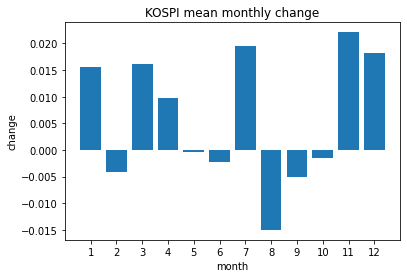

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

a = kospi_change.groupby('Month').mean().reset_index()
plt.bar( range(1,13), a['Log_Rate'])
plt.title('KOSPI mean monthly change')
plt.xticks(range(1,13))
plt.xlabel('month')
plt.ylabel('change')

KOSPI 월 평균 수익률 바플랏

In [19]:
j = kospi_change[kospi_change['Month'] == 1].reset_index()
print(np.sum(j['Log_Rate'] > 0)) #21
print(np.sum(j['Log_Rate'] < 0)) #20 

21
20


1월 수익률 > 0 : 21 <br>
1월 수익률 < 0 : 20

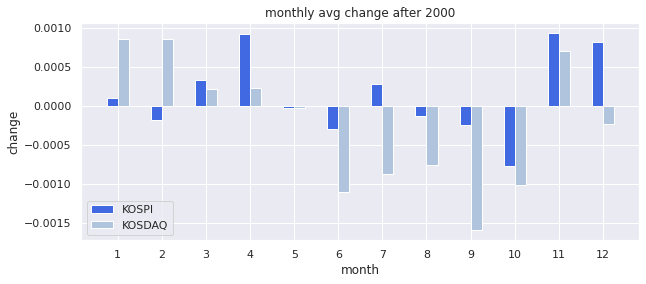

In [53]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 4

X1=[1,3,5,7,9,11,13,15,17,19,21,23]

a = kospi[kospi['Year'] >= 2000].groupby('Month').mean().reset_index()
plt.bar(X1, a['Log_Rate'], color = 'royalblue', width = 0.5, label = 'KOSPI')
plt.xticks(range(1,13))
plt.xlabel('month')
plt.ylabel('change')
plt.grid(True)

X2=[1.5,3.5,5.5,7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5,23.5]
a = kosdaq[kosdaq['Year'] >= 2000].groupby('Month').mean().reset_index()
plt.bar(X2, a['Log_Rate'], color = 'lightsteelblue', width = 0.5, label = 'KOSDAQ')
plt.xticks(range(1,13))
plt.xlabel('month')
plt.ylabel('change')
plt.grid(True)

X3=[1.25,3.25,5.25,7.25,9.25,11.25,13.25,15.25,17.25,19.25,21.25,23.25]
plt.xticks(X3,range(1,13))
plt.legend()
plt.title('monthly avg change after 2000')
plt.show()

## KOSPI

In [ ]:
## 1월 효과
kospi_change.groupby('Month')['Log_Rate'].mean().plot(kind='bar')
sns.barplot(data = kospi_change.groupby('Month')['Log_Rate'].mean().reset_index(),
            x = 'Month', y = 'Log_Rate')
plt.title('KOSPI mean monthly change')
plt.show()
lst = []
for i in range(1, 13): 
  t_stat, p_value = stats.ttest_ind(kospi_change[kospi_change['Month'] == 1]['Log_Rate'], kospi_change[kospi_change['Month'] == i]['Log_Rate'], 
                                    equal_var=True, alternative="greater")
  lst.append(p_value)

lst = pd.DataFrame(lst)
lst.plot(kind = 'bar',)
plt.axhline(0.05, color='black', lw=2)
plt.show()
t_stat, p_value = stats.ttest_ind(kospi_change[kospi_change['Month'] == 1]['Log_Rate'], kospi_change[kospi_change['Month'] != 1]['Log_Rate'], equal_var=False, alternative="greater")
print(i, "t-statistics : {}, p-value : {}".format(t_stat, p_value))
p-value > 0.05 -> 귀무가설 기각 불가 <br>
1월 평균 수익률 <= 나머지 달 평균 수익률

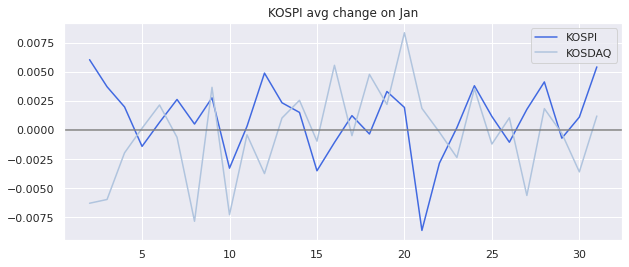

In [55]:
a = kospi[kospi['Month'] == 1].groupby(['Month','Day']).mean().reset_index()
b = kosdaq[kosdaq['Month'] == 1].groupby(['Month','Day']).mean().reset_index()

plt.plot(a['Day'], a['Change'], color = 'royalblue', label = 'KOSPI') 
plt.plot(b['Day'], b['Change'], color = 'lightsteelblue', label = 'KOSDAQ')
plt.legend() # 위에 label을 추가함으로써 자동으로 생김 
plt.axhline(0, color = 'grey')
plt.title('KOSPI avg change on Jan')

plt.show()

<BarContainer object of 359 artists>

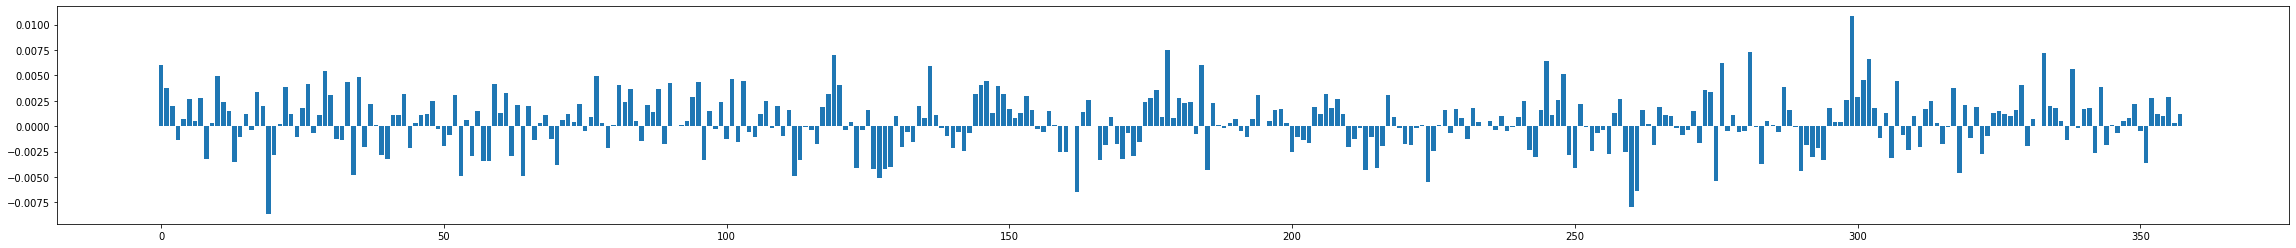

In [24]:
rcParams['figure.figsize'] = 40, 4

a = kospi.groupby(['Month','Day']).mean()
plt.bar(range(len(a)), a['Change'])


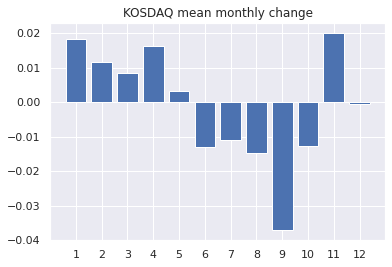

In [57]:
rcParams['figure.figsize'] = 6, 4
a = kosdaq_change.groupby('Month').mean().reset_index()
plt.bar( range(1,13), a['Log_Rate'])
plt.title('KOSDAQ mean monthly change')
plt.xticks(range(1,13))
plt.show()

KOSDAQ 월 평균 수익률

### 박스플랏

In [28]:
kosdaq_1_12 = kosdaq_change[(kosdaq_change['Month'] == 1) | (kosdaq_change['Month'] == 12) ]
nasdaq_1_12 = nasdaq_change[(nasdaq_change['Month'] == 1) | (nasdaq_change['Month'] == 12) ]   

kosdaq_month = list(kosdaq_1_12['Month'])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


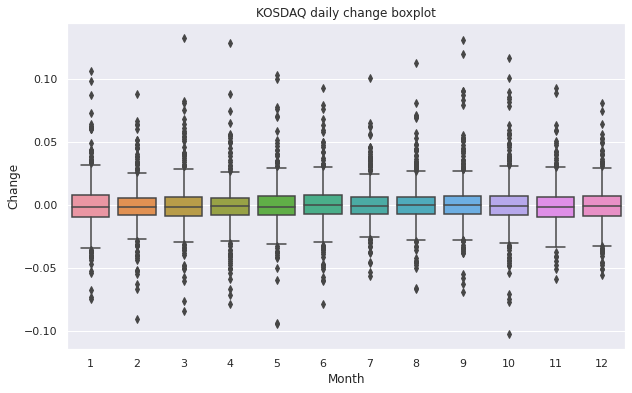

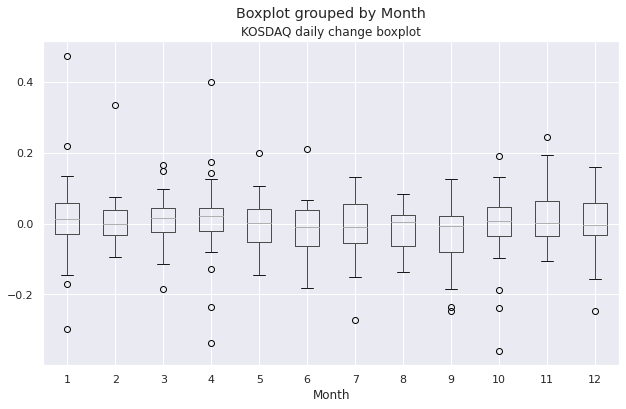

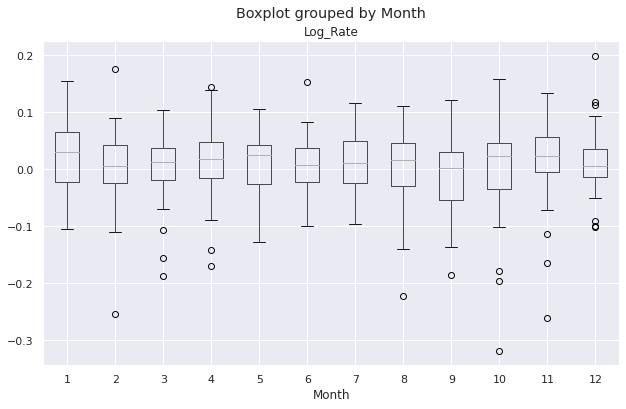

In [29]:
sns.set(rc={'figure.figsize':(10, 6)})
sns.boxplot(data = kosdaq, x = 'Month', y = 'Change')
plt.title('KOSDAQ daily change boxplot')

kosdaq_change.boxplot(column='Log_Rate',by='Month', figsize = (10,6))
plt.title('KOSDAQ daily change boxplot')
nasdaq_change.boxplot(column='Log_Rate',by='Month', figsize = (10,6))
plt.show()


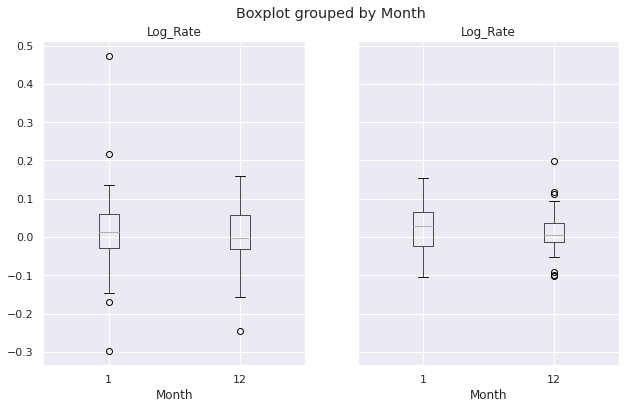

In [30]:
fig, axs = plt.subplots(1, 2, sharey=True)
kosdaq_1_12.boxplot(column = 'Log_Rate', by = 'Month', figsize = (3,8), ax=axs[0])
nasdaq_1_12.boxplot(column = 'Log_Rate', by = 'Month', figsize = (3,8), ax=axs[1])
plt.show()

박스 플랏을 그리고자 했으나 일단 버려 

### 개인, 기관, 외국인 매매량 비교 

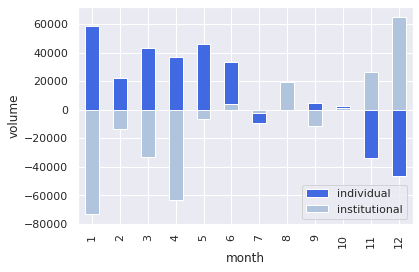

In [31]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

trade.groupby('Month')['개인'].mean().plot(kind = 'bar', color = 'royalblue', label = 'individual')
plt.xlabel('month')
plt.ylabel('volume')

trade.groupby('Month')['기관 합계'].mean().plot(kind = 'bar', color = 'lightsteelblue', label = 'institutional' )
plt.xlabel('month')
plt.ylabel('volume')
plt.legend()
plt.show()



개인 투자자 월별 거래량 

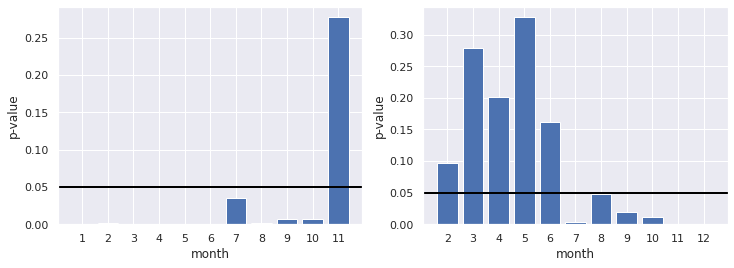

In [32]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

## 12월 검정 
lst = []
for i in range(1, 12): 
  t_stat, p_value = stats.ttest_ind(trade[trade['Month'] == 12]['개인'], trade[trade['Month'] == i]['개인'], equal_var=False, alternative="less")
  lst.append(p_value)

df = pd.DataFrame()
df['Change'] = lst
plt.subplot(121)
plt.xlabel('month')
plt.xticks(range(1,12))
plt.ylabel('p-value')
plt.bar(range(1,12), lst )
plt.axhline(0.05, color='black', lw=2)


## 1월 검정 
lst = []
for i in range(2, 13): 
  t_stat, p_value = stats.ttest_ind(trade[trade['Month'] == 1]['개인'], trade[trade['Month'] == i]['개인'], equal_var=True, alternative="greater")
  lst.append(p_value)

plt.subplot(122)
plt.bar(range(2,13), lst )
plt.xlabel('month')
plt.xticks(range(2,13))
plt.ylabel('p-value')
plt.axhline(0.05, color='black', lw=2)
plt.show()

12월, 1월 t-test p-value

In [33]:
t_stat, p_value = stats.ttest_ind(trade[trade['Month'] == 12]['개인'], trade[trade['Month'] != 12]['개인'], equal_var=False, alternative="less")
print(p_value)

t_stat, p_value = stats.ttest_ind(trade[trade['Month'] == 1]['개인'], trade[trade['Month'] != 12]['개인'], equal_var=False, alternative="greater")
print(p_value)

t_stat, p_value = stats.ttest_ind(trade[trade['Month'] == 1]['개인'], trade[trade['Month'] == 12]['개인'], equal_var=False, alternative="greater")
print(p_value)

2.9224487139229464e-05
0.03860360478806066
4.207236192733196e-05


In [34]:
monthly = trade.groupby(['Year','Month']).sum().reset_index()

for i in range(len(monthly)) : 
  monthly.loc[i,'Date'] = monthly.loc[i, 'Year'].astype(str) + '-' + monthly.loc[i, 'Month'].astype(str)

monthly

,Year,Month,Unnamed: 0,기관 합계,기타법인,개인,외국인 합계,전체,Day,Weekday,Date
0,1999,1,4770,-1335259.0,0.0,66766.0,1268492.0,0.0,330,40,1999-1
1,1999,2,3740,-175231.0,0.0,102428.0,72801.0,0.0,222,37,1999-2
2,1999,3,4411,102168.0,0.0,-546291.0,444124.0,0.0,359,43,1999-3
3,1999,4,3759,99806.0,0.0,-1119573.0,1019767.0,0.0,348,47,1999-4
4,1999,5,3170,192324.0,0.0,-115631.0,-76696.0,0.0,336,38,1999-5
...,...,...,...,...,...,...,...,...,...,...,...
283,2022,8,2035,-2948617.0,-826793.0,-29058.0,3804464.0,0.0,345,43,2022-8
284,2022,9,1430,-1615937.0,230084.0,3295415.0,-1909562.0,0.0,332,43,2022-9
285,2022,10,988,-1014254.0,308663.0,-2505681.0,3211272.0,0.0,328,40,2022-10
286,2022,11,693,-357551.0,105712.0,-3885520.0,4137359.0,0.0,337,43,2022-11


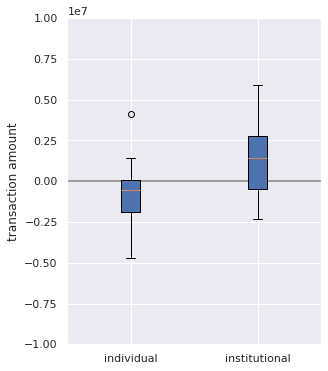

"\nplt.subplot(122)\nplt.boxplot([monthly[monthly['Month'] == 1]['개인'], monthly[monthly['Month'] == 1]['기관 합계'], monthly[monthly['Month'] == 1]['외국인 합계']  ], patch_artist=True)\nplt.ylim(-10000000,10000000)\nplt.xlabel('month')\nplt.xticks([1,2],labels = ['individual','institutional'])\nplt.axhline(0, color = 'grey')\nplt.show()\n"

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6

plt.subplot(121)
plt.boxplot([monthly[monthly['Month'] == 12]['개인'], monthly[monthly['Month'] == 12]['기관 합계']] , patch_artist=True)
plt.ylim(-10000000,10000000)
plt.ylabel('transaction amount')
plt.xticks([1,2],labels = ['individual','institutional'])
plt.axhline(0, color = 'grey')
plt.show()

'''
plt.subplot(122)
plt.boxplot([monthly[monthly['Month'] == 1]['개인'], monthly[monthly['Month'] == 1]['기관 합계'], monthly[monthly['Month'] == 1]['외국인 합계']  ], patch_artist=True)
plt.ylim(-10000000,10000000)
plt.xlabel('month')
plt.xticks([1,2],labels = ['individual','institutional'])
plt.axhline(0, color = 'grey')
plt.show()
'''

### 버려 

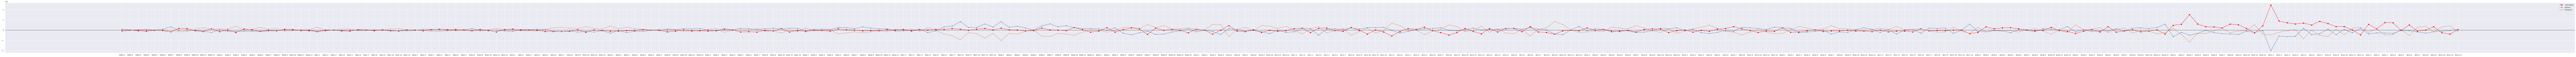

In [36]:
rcParams['figure.figsize'] = 300, 6

plt.plot(monthly.Date, monthly['개인'], marker = 's', color = 'red', label =' individual')
plt.plot(monthly.Date, monthly['기관 합계'], marker = '*', label = 'kikwan')
plt.plot(monthly.Date, monthly['외국인 합계'], marker = '+', label = 'foreigner')
plt.axhline(0, color='black', lw=1)

plt.legend() # 위에 label을 추가함으로써 자동으로 생김 
plt.show()

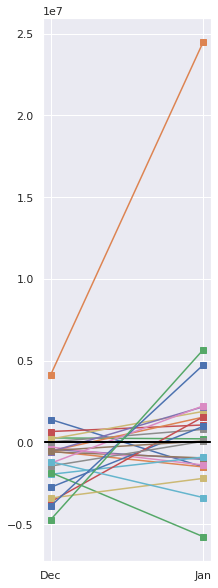

In [37]:
plt.figure(figsize = (3, 10))
for i in range(min(trade['Year']), max(trade['Year'])): 
  plt.plot([1, 12], [monthly[(monthly['Year'] == i) & (monthly['Month'] == 12)]['개인'], monthly[(monthly['Year'] == i+1) & (monthly['Month'] == 1)]['개인']], marker = 's')
  plt.xticks([1, 12], ['Dec','Jan'])
plt.axhline(0, color='black', lw=2)

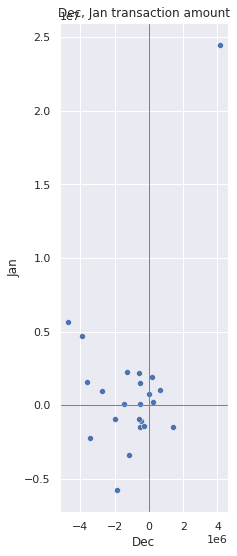

In [58]:
month = monthly.drop(0, axis = 0)

dec_jan = pd.concat([month[month['Month'] ==12 ]['개인'].reset_index(),
                     month[month['Month'] == 1]['개인'].reset_index()], axis = 1)

dec_jan.columns = ['index','Dec','index2','Jan']
dec_jan

plt.figure(figsize = (3,9))
sns.scatterplot(data = dec_jan, x = 'Dec', y = 'Jan')
plt.title('Dec, Jan transaction amount')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)